<img align="left" src="../assets/books.png">

# Book Recommender Engines

## Part 3: Content-Based: Data Cleaning and EDA<br>
***

#### Contents:
- [Imports](#Imports)
- [Reading in the Data](#Reading-in-the-Data)
- [Preliminary Exploratory Data Analysis](#Preliminary-Exploratory-Data-Analysis)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Saving the DataFrame](#Saving-the-DataFrame)

### Imports

In [1]:
#importing in the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings to turn off future warnings
import warnings
warnings.simplefilter(action='ignore')

### Reading in the Data

With content-based engines, recommendations are made based on the features of the product. With this in mind, I chose a data set from [Kaggle](https://www.kaggle.com/brosen255/goodreads-books) that offers about 20k titles from popular lists on Goodreads. Each title has a variety of information included about it, such as genre and average rating.

In [2]:
#reading in the data
goodreads = pd.read_csv('../datasets/goodreads/goodreads.csv')
goodreads.head()

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
0,4.45,female,"fiction,",1077326,J.K. Rowling\n,/author/show/1077326.J_K_Rowling,21106819,516421,United Kingdom\n,4.56,https://www.goodreads.com/book/show/1.Harry_Po...,1,\n Harry Potter and the Half-Blood Prince\n,Fantasy,Young Adult,2036961,32557,652,2005,1217
1,4.45,female,"fiction,",1077326,J.K. Rowling\n,/author/show/1077326.J_K_Rowling,21106819,516421,United Kingdom\n,4.48,https://www.goodreads.com/book/show/2.Harry_Po...,2,\n Harry Potter and the Order of the Phoe...,Fantasy,Young Adult,2087093,34321,870,2003,690
2,4.45,female,"fiction,",1077326,J.K. Rowling\n,/author/show/1077326.J_K_Rowling,21117318,516745,United Kingdom\n,4.55,https://www.goodreads.com/book/show/5.Harry_Po...,5,\n Harry Potter and the Prisoner of Azkab...,Fantasy,Young Adult,2276977,44377,435,1999,368
3,4.45,female,"fiction,",1077326,J.K. Rowling\n,/author/show/1077326.J_K_Rowling,21103858,516320,United Kingdom\n,4.55,https://www.goodreads.com/book/show/5.Harry_Po...,5,\n Harry Potter and the Prisoner of Azkab...,Fantasy,Young Adult,2275315,44330,435,1999,737
4,4.20,male,"science-fiction,mystery,",4,Douglas Adams\n,/author/show/4.Douglas_Adams,2351569,50433,United Kingdom\n,4.38,https://www.goodreads.com/book/show/13.The_Ult...,13,\n The Ultimate Hitchhiker's Guide to the...,Science Fiction,Fiction,255070,4753,815,1996,2374


### Preliminary Exploratory Data Analysis

For preliminary EDA, I evaluated content types within each file, as well as whether or not there was missing data. At this point, I'm assessing what needs to be cleaned as well as what options I have for features to use in the recommender.

In [3]:
#Dropping the columns I know I won't be using
goodreads.drop(['author_page_url', 'book_fullurl', 'author_gender', 'author_genres', 'author_average_rating', 'author_id', 'birthplace', 'author_rating_count', 'author_review_count', 'book_id'], 1,  inplace=True)

In [4]:
# Looking at how large the file is
goodreads.shape

(22287, 10)

In [5]:
#taking a look at the user file types
goodreads.dtypes

author_name             object
book_average_rating    float64
book_title              object
genre_1                 object
genre_2                 object
num_ratings              int64
num_reviews              int64
pages                    int64
publish_date             int64
score                    int64
dtype: object

In [6]:
#Looking for nulls
goodreads.isnull().sum()

author_name            0
book_average_rating    0
book_title             0
genre_1                0
genre_2                0
num_ratings            0
num_reviews            0
pages                  0
publish_date           0
score                  0
dtype: int64

In [7]:
#Checking out the summary stats
goodreads.describe()

,book_average_rating,num_ratings,num_reviews,pages,publish_date,score
count,22287.000000,2.228700e+04,22287.000000,22287.000000,22287.000000,22287.000000
mean,3.952686,4.738297e+04,2352.993808,332.293175,1939.307534,3840.863373
std,0.289797,1.814059e+05,6887.678342,211.072687,342.738780,10732.201140
min,0.000000,0.000000e+00,0.000000,0.000000,-720.000000,55.000000
25%,3.770000,8.150000e+02,106.000000,240.000000,1998.000000,831.000000
50%,3.960000,4.479000e+03,388.000000,316.000000,2011.000000,1719.000000
75%,4.140000,2.100200e+04,1529.000000,384.000000,2013.000000,3581.500000
max,5.000000,3.820921e+06,147696.000000,6680.000000,2019.000000,598270.000000


Looking over the numbers, it looks like num_ratings looks like it may have some anomalies. Standard deviation looks a bit odd. Also noting that for num_reviews and score there seems to be a significant difference in the numbers. My guess is something like Harry Potter is causing some fantastical spiking in the numbers. Also noting that year doesn't show up. Must be text in that column somewhere.

In [8]:
#Taking a closer look at num_ratings
goodreads['num_ratings'].sort_values(ascending=False).head()

241    3820921
243    3819552
242    3819418
244    3819020
245    3818591
Name: num_ratings, dtype: int64

I see what's going on with ratings. The numbers are very big is all. And the range is pretty extreme. I expected less of an extremity there because the data was described as being pulled from top rated lists. If the lists are user-created, then that's where the anomalies will come into play. People will always add books to the lists that don't actually qualify. It's the nature of user-based lists. I'll make a note to try the recommender with and without using these columns to see how it affects the scores. 

### Data Cleaning

What I noticed in preliminary EDA was that there are new row (\n) tags in the author name and book title. Also, I was able to see that there are some duplicate titles. Plus, I wanted to figure out what was going on with the publish_date numbers more. One thing I'll add too that I didn't discover until I got errors in the model was that there are tabs after the first \n's in the title fields. So I had to come back to data cleaning and remove them and then move forward again.

In [9]:
#Dropping duplicates
goodreads = goodreads.drop_duplicates(subset ="book_title")
goodreads.head()

,author_name,book_average_rating,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
0,J.K. Rowling\n,4.56,\n Harry Potter and the Half-Blood Prince\n,Fantasy,Young Adult,2036961,32557,652,2005,1217
1,J.K. Rowling\n,4.48,\n Harry Potter and the Order of the Phoe...,Fantasy,Young Adult,2087093,34321,870,2003,690
2,J.K. Rowling\n,4.55,\n Harry Potter and the Prisoner of Azkab...,Fantasy,Young Adult,2276977,44377,435,1999,368
4,Douglas Adams\n,4.38,\n The Ultimate Hitchhiker's Guide to the...,Science Fiction,Fiction,255070,4753,815,1996,2374
5,Bill Bryson\n,4.20,\n A Short History of Nearly Everything\n,Nonfiction,Science,240843,10362,544,2003,1079


I noticed new row markers (\n) in the book title column so I'm going to remove them, as well as extra space on the front and back of the titles. 

In [10]:
#Removing the \n's from the title column
goodreads['book_title'] = goodreads['book_title'].map(lambda cell: cell.replace("\n",""))

In [11]:
#Removing the \n's from the author column
goodreads['author_name'] = goodreads['author_name'].map(lambda cell: cell.replace("\n",""))

In [12]:
#Removing extra space from the title
goodreads['book_title'] = goodreads['book_title'].map(lambda cell: cell.strip())

In [13]:
#Removing extra space from the author
goodreads['author_name'] = goodreads['author_name'].map(lambda cell: cell.strip())

I noticed negatives in the year column so I'm going to take a closer look there.

In [14]:
#Checking out the year column
goodreads['publish_date'].sort_values(ascending=True).head()

142    -720
144    -720
3974   -600
1424   -560
874    -500
Name: publish_date, dtype: int64

There are a lot of incorrect year listings. I'm going to take a sample of the data set and pull everything from 1900 and upward.

In [15]:
#pulling a sample set based on the year being 1900 and above. 
goodreads_sample = goodreads[goodreads['publish_date'] >= 1900]

In [16]:
#checking the updated size 
goodreads_sample.shape

(15144, 10)

### Further Exploratory Data Analysis

After cleaning up the data, I wanted to do more analysis.

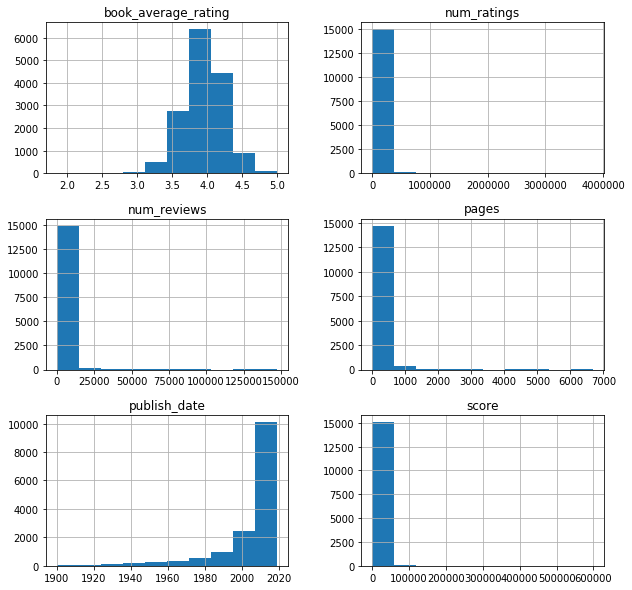

In [17]:
#checking out the numeric columns
goodreads_sample.hist(figsize=(10,10));

The book ratings seem to mostly range between 3-5, though there are ratings lower than that.

In [18]:
#Taking a closer look at the book ratings
goodreads['book_average_rating'].sort_values(ascending=True).head()

19674    0.00
8704     1.85
7274     2.07
11948    2.09
19256    2.14
Name: book_average_rating, dtype: float64

In [19]:
#Checking out the counts for the years
goodreads['publish_date'].value_counts().head()

2013    1873
2012    1486
2014    1417
2011    1120
2015     854
Name: publish_date, dtype: int64

The years really do seem to cluster around more current releases. Next I want to take a look at how many of each genre we have in this data set.

In [20]:
#Checking out the top genres
top_genres = goodreads_sample['genre_1'].value_counts()
top_genres.head(10)

Romance            2462
Fantasy            2274
Young Adult        1499
Fiction            1398
Historical         1051
Science Fiction     673
Mystery             615
Nonfiction          584
Sequential Art      435
Horror              385
Name: genre_1, dtype: int64

It's interesting to see that there is so much more romance and fantasy than other categories. I'm going to plot this.

In [21]:
#setting a value for just the top ten genres
top10 = top_genres.sort_values(ascending = False)[:10]

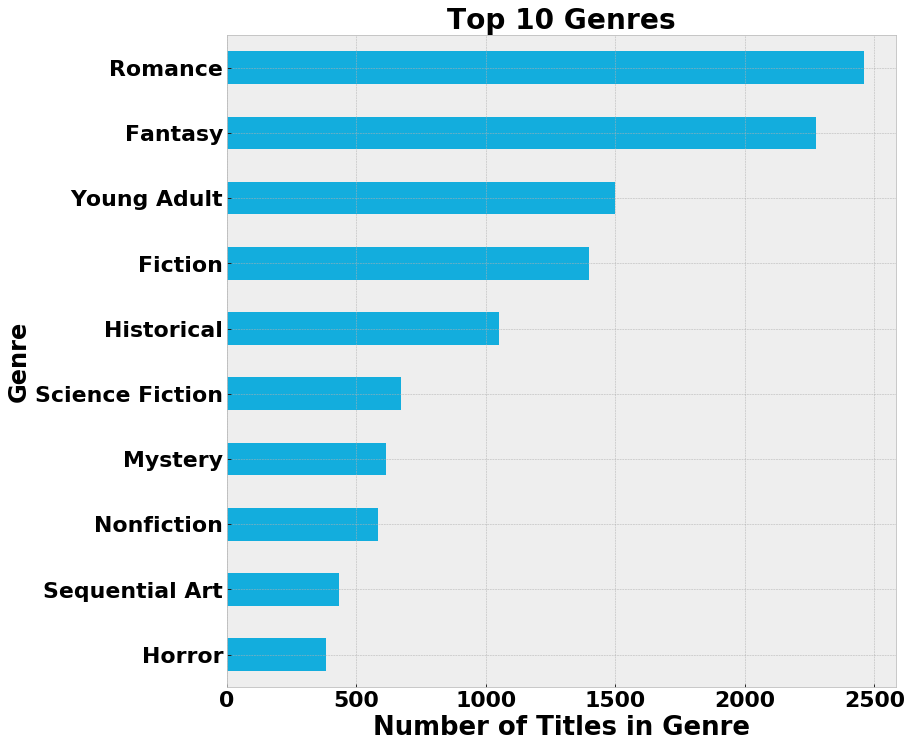

In [22]:
#plotting the top ten genres - larger sized chart is so I can use it for the presentation
plt.style.use('bmh')
plt.figure(figsize = (12,12))
top10.sort_values(ascending=True).plot(kind = "barh", color="#13addd")
plt.title("Top 10 Genres", fontsize=28,fontweight='bold')
plt.xlabel("Number of Titles in Genre", fontsize=26,fontweight='bold')
plt.ylabel("Genre", fontsize=24,fontweight='bold')
plt.xticks(fontsize= 22,fontweight='bold')
plt.yticks(fontsize= 22,fontweight='bold')
plt.show();

### Saving the DataFrame

In [23]:
#saving the sample dataframe to a csv
goodreads_sample.to_csv('../datasets/goodreads/goodreads_sample.csv')

**Please continue to [4-Content-Based-Preprocessing-and-Engine.ipynb](./4-Content-Based-Preprocessing-and-Engine.ipynb) for the next step in the project: Content-Based: Preprocessing and Engine**